In [ ]:
import os
import urllib
import zipfile

# Download and unzip the dataset
if not os.path.isfile('.zip'):
  urllib.request.urlretrieve("https://github.com/Mouneshgouda/Brain-Tumor-Data-Set/archive/refs/heads/main.zip", "cancer.zip")

zip_filename = "cancer.zip"
with zipfile.ZipFile("cancer.zip","r") as zip_ref:
    zip_ref.extractall(".")


In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SIZE=64
LARGE_SIZE=32

In [ ]:
train_path="/content/Brain-Tumor-Data-Set-main/Brain Tumor Data Set/Train"
val_path="/content/Brain-Tumor-Data-Set-main/Brain Tumor Data Set/Test"

In [ ]:
train_data=ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,
    target_size=[IMG_SIZE,IMG_SIZE],
    batch_size=IMG_SIZE,
    class_mode='binary'
                                                                   )

Found 3903 images belonging to 2 classes.


In [ ]:
val_data=ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path,
    target_size=[IMG_SIZE,IMG_SIZE],
    batch_size=IMG_SIZE,
    class_mode='binary'
                                                                   )

Found 950 images belonging to 2 classes.


In [ ]:
model=Sequential([
    Flatten(input_shape=(IMG_SIZE,IMG_SIZE,3)),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_data,epochs=5,validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5680 - loss: 1.0784

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.5687 - loss: 1.0735 - val_accuracy: 0.6863 - val_loss: 0.5550
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.7734 - loss: 0.5171 - val_accuracy: 0.7432 - val_loss: 0.5008
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.8114 - loss: 0.4473 - val_accuracy: 0.8168 - val_loss: 0.4197
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.8587 - loss: 0.3723 - val_accuracy: 0.8105 - val_loss: 0.4209
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.8829 - loss: 0.3305 - val_accuracy: 0.8916 - val_loss: 0.3297


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

Saving bt.jpeg to bt.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


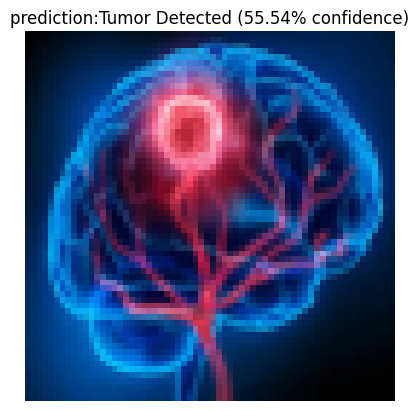

In [ ]:
uploaded=files.upload()
for file_name in uploaded.keys():
  img_path=file_name
  img = Image.open(img_path).resize((IMG_SIZE,IMG_SIZE))

  if img.mode !='RGB':
    img=img.convert('RGB')
    uploaded=files.upload()
for file_name in uploaded.keys():
  img_path=file_name
  img=Image.open(img_path).resize((IMG_SIZE,IMG_SIZE))
  if img.mode != 'RGB':
    img=img.convert('RGB')
  img_array=np.array(img)/255.0
  img_array=np.expand_dims(img_array,axis=0)
  prediction=model.predict(img_array)[0][0]
  label="Tumor Detected" if prediction>0.5 else "No Tumor Detected"
  confidence=prediction if prediction>0.5 else 1-prediction
  plt.imshow(img)
  plt.axis('off')
  plt.title(f"prediction:{label} ({confidence:.2%} confidence)")
  plt.show()

In [ ]:

import os
import urllib
import zipfile

# Download and unzip the dataset
if not os.path.isfile('.zip'):
  urllib.request.urlretrieve("https://github.com/Mouneshgouda/Dog-and-Cat-Dataset/archive/refs/heads/main.zip", "Cat Dog Data Set.zip")

zip_filename = "Cat_Dog_Dataset.zip"
with zipfile.ZipFile("Cat Dog Data Set.zip","r") as zip_ref:
    zip_ref.extractall(".")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SIZE=64
BATCH_SIZE=32

In [58]:
train_path="/content/Dog-and-Cat-Dataset-main/data/train"
val_path="/content/Dog-and-Cat-Dataset-main/data/test"

In [59]:
train_data=ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,
    target_size=[IMG_SIZE,IMG_SIZE],
    batch_size=IMG_SIZE,
    class_mode='binary')

Found 19989 images belonging to 2 classes.


In [61]:
model=Sequential([
    Flatten(input_shape=(IMG_SIZE,IMG_SIZE,3)),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
model.fit(train_data,epochs=5,validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 126ms/step - accuracy: 0.4984 - loss: 1.3718 - val_accuracy: 0.4389 - val_loss: 0.6933
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5611 - val_loss: 0.6931
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 125ms/step - accuracy: 0.4951 - loss: 0.6932 - val_accuracy: 0.5611 - val_loss: 0.6928
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 123ms/step - accuracy: 0.5034 - loss: 0.6931 - val_accuracy: 0.4389 - val_loss: 0.6932
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.4389 - val_loss: 0.6932


In [64]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

Saving dog.jpeg to dog (4).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


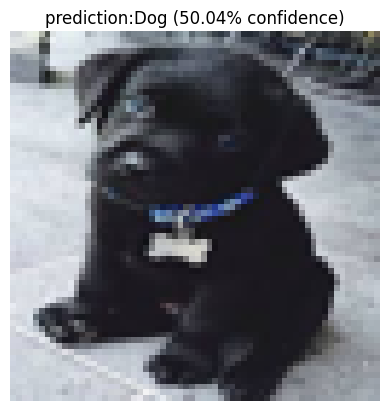

In [70]:
uploaded=files.upload()
for file_name in uploaded.keys():
  img_path=file_name
  img = Image.open(img_path).resize((IMG_SIZE,IMG_SIZE))

  if img.mode !='RGB':
    img=img.convert('RGB')
    uploaded=files.upload()
for file_name in uploaded.keys():
  img_path=file_name
  img=Image.open(img_path).resize((IMG_SIZE,IMG_SIZE))
  if img.mode != 'RGB':
    img=img.convert('RGB')
  img_array=np.array(img)/255.0
  img_array=np.expand_dims(img_array,axis=0)
  prediction=model.predict(img_array)[0][0]
  label="Dog" if prediction>0.5 else "Cat"
  confidence=prediction if prediction>0.5 else 1-prediction
  plt.imshow(img)
  plt.axis('off')
  plt.title(f"prediction:{label} ({confidence:.2%} confidence)")
  plt.show()

In [71]:

import os
import urllib
import zipfile

# Download and unzip the dataset
if not os.path.isfile('plantdoc.zip'):
  urllib.request.urlretrieve("https://github.com/Mouneshgouda/PlantDoc-Dataset/archive/refs/heads/master.zip", "plantdoc.zip")

zip_filename = "plantdoc.zip"
with zipfile.ZipFile(zip_filename, "r") as zip_ref:
    zip_ref.extractall(".")

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [73]:
IMG_SIZE=64
BATCH_SIZE=32

In [74]:
train_path="/content/PlantDoc-Dataset-master/train"
val_path="/content/PlantDoc-Dataset-master/test"

In [75]:
train_data=ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,
    target_size=[IMG_SIZE,IMG_SIZE],
    batch_size=IMG_SIZE,
    class_mode='binary')

Found 2342 images belonging to 28 classes.


In [76]:
model=Sequential([
    Flatten(input_shape=(IMG_SIZE,IMG_SIZE,3)),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
model.fit(train_data,epochs=5,validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.0368 - loss: -5182.9834 - val_accuracy: 0.4389 - val_loss: 736.6968
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.0328 - loss: -36469.1484 - val_accuracy: 0.4389 - val_loss: 2120.0378
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.0294 - loss: -91059.9375 - val_accuracy: 0.4389 - val_loss: 4329.4365
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.0346 - loss: -173966.8281 - val_accuracy: 0.4389 - val_loss: 7418.7095
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.0346 - loss: -293993.0312 - val_accuracy: 0.4389 - val_loss: 11435.5088


In [79]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

Saving leaf.jpg to leaf.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


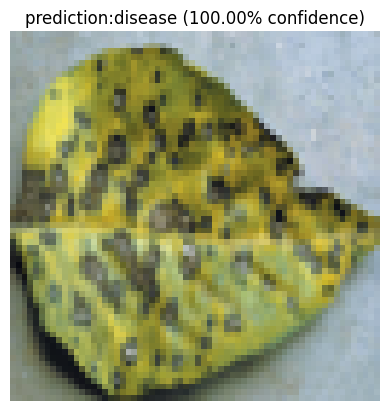

In [80]:
uploaded=files.upload()
for file_name in uploaded.keys():
  img_path=file_name
  img = Image.open(img_path).resize((IMG_SIZE,IMG_SIZE))

  if img.mode !='RGB':
    img=img.convert('RGB')
    uploaded=files.upload()
for file_name in uploaded.keys():
  img_path=file_name
  img=Image.open(img_path).resize((IMG_SIZE,IMG_SIZE))
  if img.mode != 'RGB':
    img=img.convert('RGB')
  img_array=np.array(img)/255.0
  img_array=np.expand_dims(img_array,axis=0)
  prediction=model.predict(img_array)[0][0]
  label="disease" if prediction>0.5 else "no disease"
  confidence=prediction if prediction>0.5 else 1-prediction
  plt.imshow(img)
  plt.axis('off')
  plt.title(f"prediction:{label} ({confidence:.2%} confidence)")
  plt.show()